## Performance Analysis of Apple , Microsoft , Tesla (2022-2024)

### Data Collection & Pre-Processing

In [1]:
import pandas as pd

# Load your extracted data CSV file
df = pd.read_csv('Finance.csv')

In [2]:
df = df.sort_values(by=['Company', 'Year'])

In [3]:
df.describe()

,Year,Total Revenue,Net Income
count,9.000000,9.000000,9.000000
mean,2023.000000,233320.000000,62053.666667
std,0.866025,130006.968331,39095.864110
min,2022.000000,81462.000000,7153.000000
25%,2022.000000,97690.000000,14974.000000
50%,2023.000000,211915.000000,72738.000000
75%,2024.000000,383285.000000,93736.000000
max,2024.000000,394328.000000,99803.000000


In [4]:
cols_to_convert = ['Total Revenue', 'Net Income','Total Assets', 
                   'Total Liabilities', 'Cash Flow from Operating Activities']

# Remove currency symbols, commas, etc.
for col in cols_to_convert:
    df[col] = df[col].replace('[\$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Calculating Growth %

In [5]:
# Convert relevant columns to numeric
cols_to_convert = ['Total Revenue', 'Net Income', 'Total Assets', 
                   'Total Liabilities', 'Cash Flow from Operating Activities']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, turn invalid values into NaN

# Now safely calculate growth percentages
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100


In [6]:
# Display the first few rows to check
df.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
5,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,NaN,NaN,NaN
4,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942


In [7]:
# Summary statistics
df.describe()

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2023.000000,233320.000000,62053.666667,296702.555556,186236.222222,76557.333333,6.919395,-3.026319,14.114441,9.156016,5.633755
std,0.866025,130006.968331,39095.864110,153240.424606,114506.220759,48272.769855,8.622446,26.561035,11.445273,8.764570,17.081136
min,2022.000000,81462.000000,7153.000000,82338.000000,36440.000000,13256.000000,-2.800461,-52.230533,-0.048759,-3.855232,-9.970117
25%,2022.000000,97690.000000,14974.000000,122070.000000,48390.000000,14923.000000,1.216182,-3.223361,5.866948,4.333976,-7.535230
50%,2023.000000,211915.000000,72738.000000,352755.000000,205753.000000,89035.000000,4.452012,-1.665921,13.706249,9.284379,2.671812
75%,2024.000000,383285.000000,93736.000000,364980.000000,290437.000000,118254.000000,13.472979,14.093433,21.862203,16.648004,11.175470
max,2024.000000,394328.000000,99803.000000,512163.000000,308030.000000,122151.000000,18.795267,21.800417,29.488207,18.436183,35.356580


In [8]:
# Check growth trends by company
for company in df['Company'].unique():
    print(f"--- {company} ---")
    print(df[df['Company'] == company][['Year', 'Revenue Growth (%)', 'Net Income Growth (%)']])


--- Apple ---
   Year  Revenue Growth (%)  Net Income Growth (%)
5  2022                 NaN                    NaN
4  2023           -2.800461              -2.813543
3  2024            2.021994              -3.359967
--- Microsoft ---
   Year  Revenue Growth (%)  Net Income Growth (%)
2  2022                 NaN                    NaN
1  2023            6.882030              -0.518299
0  2024           15.669962              21.800417
--- Tesla ---
   Year  Revenue Growth (%)  Net Income Growth (%)
8  2022                 NaN                    NaN
7  2023           18.795267              18.964010
6  2024            0.947578             -52.230533


### Revenue and Net Income Growth Insights (2022–2024)

#### Apple :
        Apple experienced a slight revenue decline in 2023 (-2.8%), followed by a modest recovery in 2024 (+2%).
        Net income declined in both 2023 and 2024, with a slightly sharper decrease in 2024.
        
#### Microsoft :
        Microsoft shows strong and accelerating revenue growth, jumping from nearly 7% in 2023 to over 15% in 2024.
        Net income was slightly down in 2023 but rebounded strongly in 2024 with a 21.8% increase.

#### Tesla :
        Tesla experienced very strong revenue and net income growth in 2023 (~19%).
        However, revenue growth flattened in 2024 (~1%), and net income growth sharply declined by over 52%.

In [9]:
# Compute Debt-to-Asset Ratio
df['debt-to-asset'] = (df['Total Liabilities'] / df['Total Assets']) * 100

# Print company-wise Debt-to-Asset Ratio
for company in df['Company'].unique():
    print(f"--- {company} ---")
    print(df[df['Company'] == company][['Year', 'debt-to-asset']])


--- Apple ---
   Year  debt-to-asset
5  2022      85.635356
4  2023      82.374079
3  2024      84.396405
--- Microsoft ---
   Year  debt-to-asset
2  2022      54.352045
1  2023      49.942958
0  2024      47.579774
--- Tesla ---
   Year  debt-to-asset
8  2022      44.256601
7  2023      40.339342
6  2024      39.641189


### Debt-to-Asset Ratio Insights (2022–2024)

####  Apple :
        Apple consistently maintains a very high debt-to-asset ratio, hovering around 82–86%.
        This suggests that most of Apple's assets are financed by debt, which could raise leverage and financial risk.
        However, it may also reflect confidence in stable cash flows allowing them to service debt.
        
#### Microsoft :
        Microsoft's debt-to-asset ratio is steadily decreasing, from ~54% in 2022 to ~48% in 2024.
        Indicates a strong deleveraging trend, meaning Microsoft is either paying down debt or growing assets faster than liabilities.
        Reflects a strengthening financial position, increasing investor confidence.
        
#### Tesla :
        Tesla also shows a gradual reduction in its debt-to-asset ratio, from ~44% to ~39%.
        Similar to Microsoft, this indicates decreasing reliance on debt.
        May point to improved profitability or operational efficiency, allowing Tesla to reduce debt obligations or increase asset base.

### Some Visuals about data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Year')

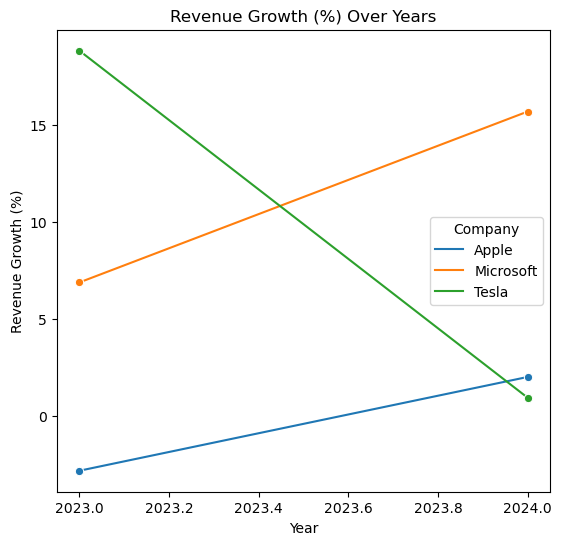

In [11]:
plt.figure(figsize=(14,6))

# Line plot for Revenue Growth
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company', marker='o')
plt.title('Revenue Growth (%) Over Years')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')

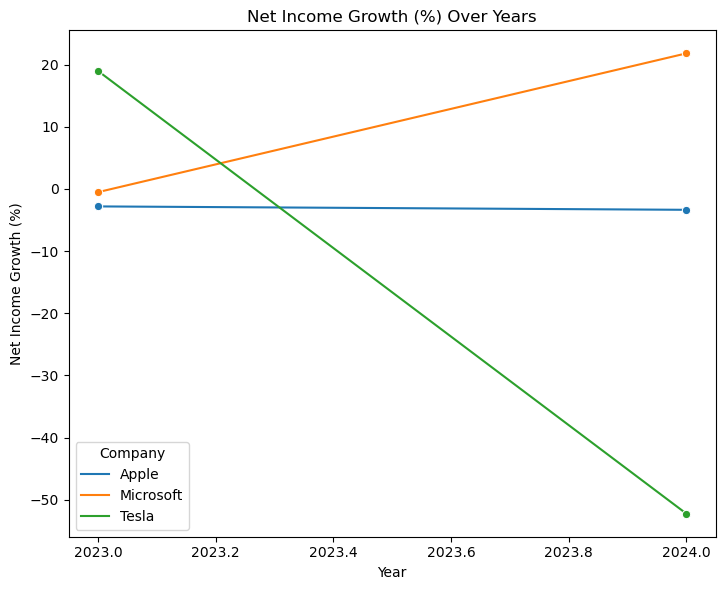

In [13]:
plt.figure(figsize=(14,6))
# Line plot for Net Income Growth
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='Year', y='Net Income Growth (%)', hue='Company', marker='o')
plt.title('Net Income Growth (%) Over Years')
plt.ylabel('Net Income Growth (%)')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

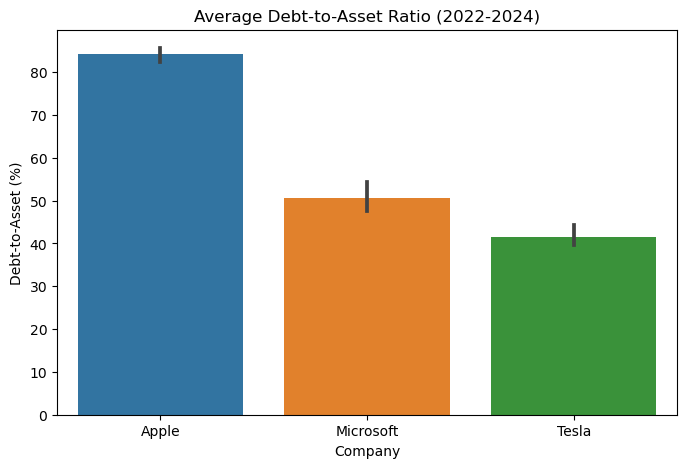

In [14]:
# Bar plot for Debt-to-Asset ratio
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Company', y='debt-to-asset')
plt.title('Average Debt-to-Asset Ratio (2022-2024)')
plt.ylabel('Debt-to-Asset (%)')
plt.show()

     Company  Year  Profit Margin (%)
5      Apple  2022          25.309641
4      Apple  2023          25.306234
3      Apple  2024          23.971256
2  Microsoft  2022          36.686337
1  Microsoft  2023          34.146238


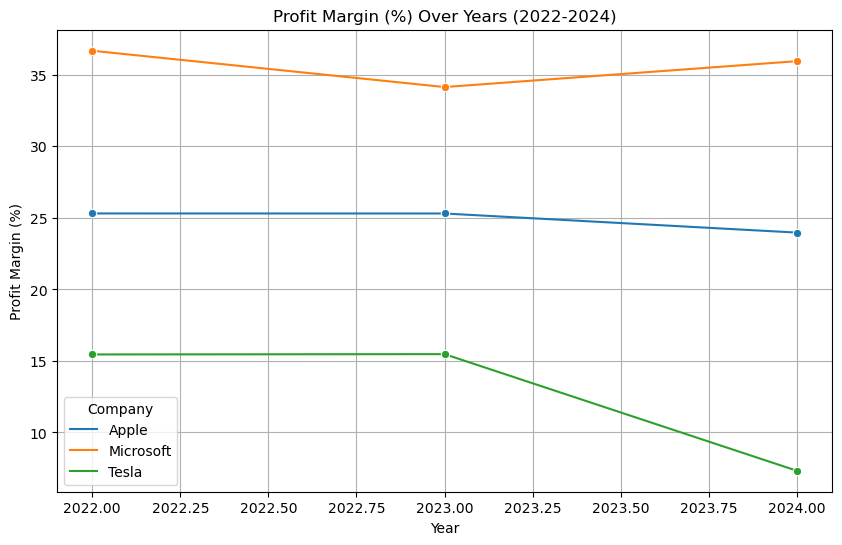

In [16]:
df['Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100

# Confirm the column is added
print(df[['Company', 'Year', 'Profit Margin (%)']].head())

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Profit Margin (%)', hue='Company', marker='o')
plt.title('Profit Margin (%) Over Years (2022-2024)')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

Revenue Growth (%)	:  Microsoft shows steady and strong revenue growth; Tesla had a spike in 2023 but slowed down; Apple had slight decline and modest recovery.

Net Income Growth (%)  :	Microsoft rebounded strongly in 2024; Tesla’s net income growth collapsed in 2024, signaling issues; Apple’s net income declined steadily.

Debt-to-Asset Ratio (%)  : 	Apple has consistently high leverage (~83-86%), suggesting higher risk; Microsoft and Tesla show improving financial stability with declining ratios.

Profit Margin (%) :	Microsoft maintains solid and improving profit margins; Tesla’s margin volatility aligns with net income swings; Apple’s margin shows slight pressure over time.
